In [190]:
# libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [191]:
!pip install scikit-learn

In [192]:
data=pd.read_csv(r'cleaned_file.csv')

In [193]:
data.shape

(12000, 10)

In [194]:
# import data
data.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.58,0.58,0.58,0.58,173.47,-135.32,-43.95,2097.94,-1123.62,-968.52
std,0.49,0.49,0.49,0.49,3161.10,3341.43,4049.91,12083.88,11735.19,11825.30
min,0.00,0.00,0.00,0.00,-15412.28,-16253.20,-19741.45,-19819.66,-19819.85,-19819.30
25%,0.00,0.00,0.00,0.00,-137.07,-435.04,-173.37,-8449.84,-12534.88,-12442.65
50%,1.00,1.00,1.00,1.00,29.31,-67.79,42.14,2504.93,-601.41,-118.51
75%,1.00,1.00,1.00,1.00,143.18,155.74,405.37,13300.76,9555.75,9898.13
max,1.00,1.00,1.00,1.00,15412.29,16253.21,19741.42,19819.71,19819.72,19819.38


In [195]:
# clean the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       12000 non-null  int64  
 1   C       12000 non-null  int64  
 2   B       12000 non-null  int64  
 3   A       12000 non-null  int64  
 4   Ia      12000 non-null  float64
 5   Ib      12000 non-null  float64
 6   Ic      12000 non-null  float64
 7   Va      12000 non-null  float64
 8   Vb      12000 non-null  float64
 9   Vc      12000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 937.6 KB


In [196]:
# Combing all fault together in one Fault_Type:
data['Fault_Type'] =data['G'].astype('str') + data['C'].astype('str') + data['B'].astype('str') + data['A'].astype('str')
data.sample(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5887,0,1,0,1,92.461987,-774.694644,682.225792,19081.893350,-12253.495620,-6828.371305,0101
10762,0,1,1,1,-723.124820,753.234895,-30.110075,-8525.758955,-6474.259263,15000.018220,0111
3999,0,0,1,1,702.044576,-560.538324,-141.498934,2661.476575,15210.864660,-17872.335100,0011
10557,0,1,1,1,685.409765,-782.304296,96.894531,9472.228334,5388.620732,-14860.849070,0111
3075,0,0,1,1,87.688660,-160.627579,72.938111,13589.374640,-12267.631150,-1321.789952,0011
9753,1,1,1,1,-652.186088,802.096587,-149.910499,-10187.621860,-4495.862743,14683.484610,1111
3953,0,0,1,1,772.798902,-681.481098,-91.310974,12358.826650,6667.065141,-19025.918630,0011
9051,1,1,1,1,-569.856685,-264.650236,834.506920,10747.737080,-14493.474040,3745.736961,1111
10456,0,1,1,1,-518.309960,-327.449751,845.759711,11540.812100,-14131.616280,2590.804184,0111
8829,1,1,0,0,-33.361280,-110.012504,484.310338,7649.535271,-19518.537430,10299.578340,1100


In [197]:
# name to the fault according to the data description
data['Fault_Type'][data['Fault_Type'] == '0000' ] = 'NO Fault'
data['Fault_Type'][data['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '1010' ] = 'Line B to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '1100' ] = 'Line C to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '0011' ] = 'Line A to Line B Fault'
data['Fault_Type'][data['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
data['Fault_Type'][data['Fault_Type'] == '0101' ] = 'Line C to Line A Fault'
data['Fault_Type'][data['Fault_Type'] == '1011' ] = 'Line A to Line B to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '1110' ] = 'Line B to Line C to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '1101' ] = 'Line C to Line A to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '1111' ] = 'Line A to Line B to Line C to Ground Fault'
data['Fault_Type'][data['Fault_Type'] == '0111' ] = 'Line A to Line B to Line C Fault'

In [198]:
data.sample(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
10554,0,1,1,1,660.737367,-797.441674,136.704308,10012.436230,4720.853908,-14733.290140,Line A to Line B to Line C Fault
6766,1,0,0,1,-494.446191,26.166112,116.274895,-9492.747244,-8689.401461,19636.690780,Line A to Ground Fault
942,1,0,1,1,13097.703880,3118.102484,-17784.849580,683.998245,-703.984594,-61.216698,Line A to Line B to Ground Fault
32,1,0,1,1,5974.836174,-16242.860210,11246.380430,-550.366159,166.356282,137.306319,Line A to Line B to Ground Fault
3135,0,0,1,1,690.493334,-633.601590,-56.886111,14656.283570,2095.067906,-16751.388340,Line A to Line B Fault
3417,0,0,1,1,-570.309818,428.166834,142.136522,1815.851979,-16607.756840,14791.885700,Line A to Line B Fault
9785,1,1,1,1,-836.306909,563.179738,273.127171,-3592.925613,-10857.419700,14450.345320,Line A to Line B to Line C to Ground Fault
11756,0,0,0,0,-139.971458,43.568903,96.402555,-13564.648350,-5696.671799,19261.320150,NO Fault
10685,0,1,1,1,167.460988,640.531915,-807.992903,-14611.444110,10417.287460,4194.156649,Line A to Line B to Line C Fault
4919,0,1,1,0,133.744717,-764.103397,630.351101,19248.569360,-5861.187789,-13387.377690,Line B to Line C Fault


In [199]:
data['Fault_Type'].value_counts(ascending=False)

,count
Fault_Type,
Line A to Line B to Ground Fault,1000
Line B to Line C to Ground Fault,1000
Line C to Line A to Ground Fault,1000
Line A to Line B Fault,1000
Line B to Line C Fault,1000
Line C to Line A Fault,1000
Line A to Ground Fault,1000
Line B to Ground Fault,1000
Line C to Ground Fault,1000


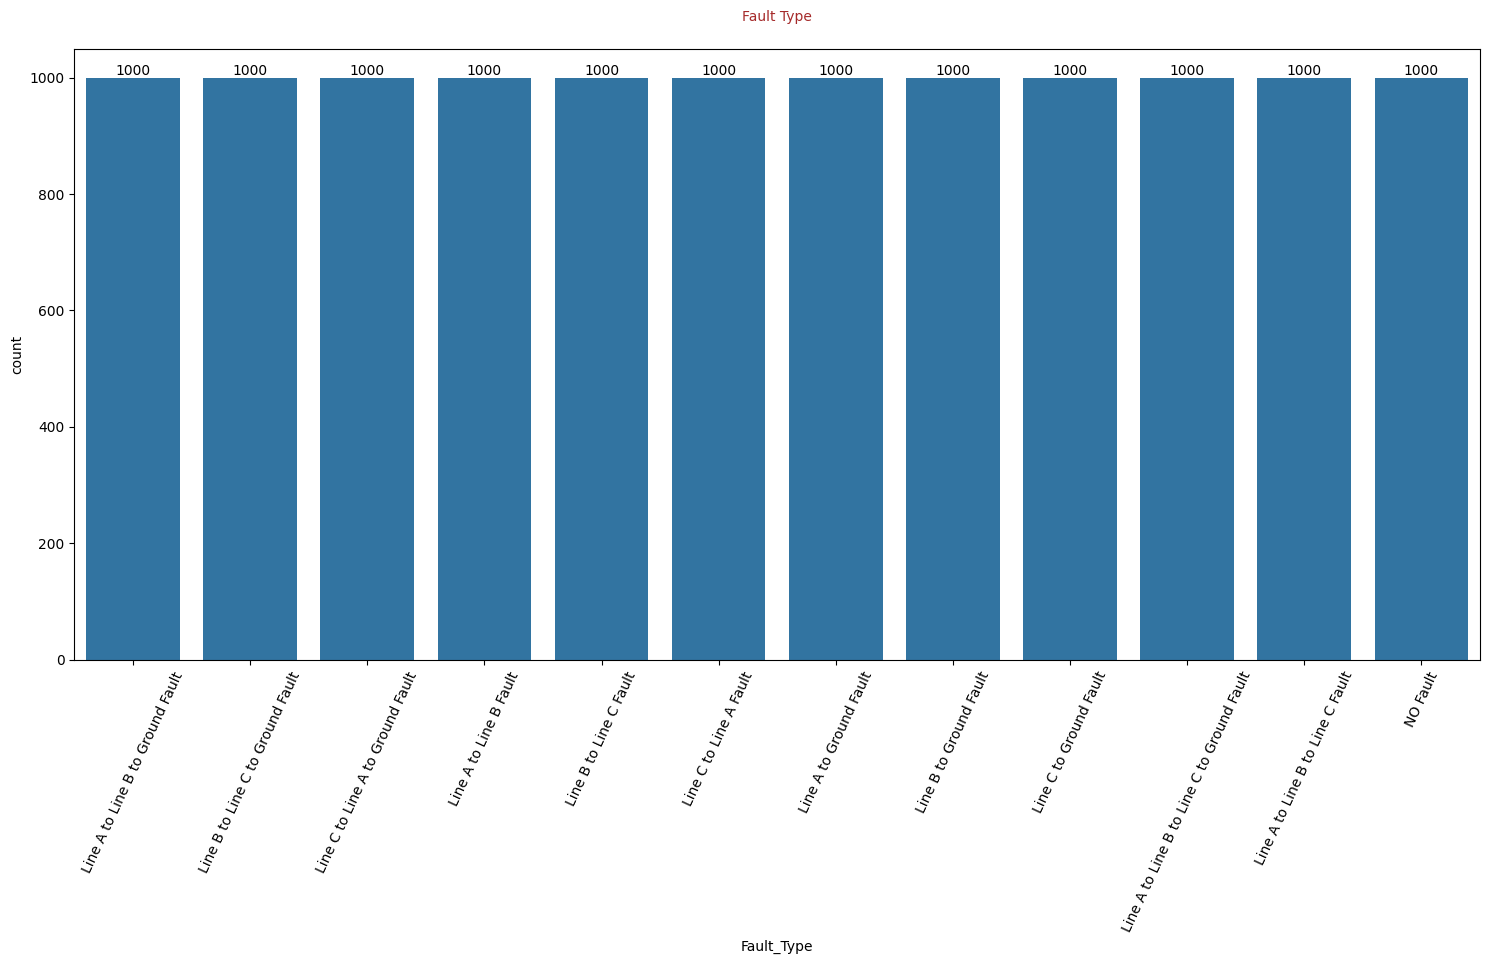

In [200]:
# Number of faults in the system according to their Fault_Type
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=data)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

# ax =plt.subplot(2,1,2)
# ax=data['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
# plt.tight_layout()
# plt.axis('off');

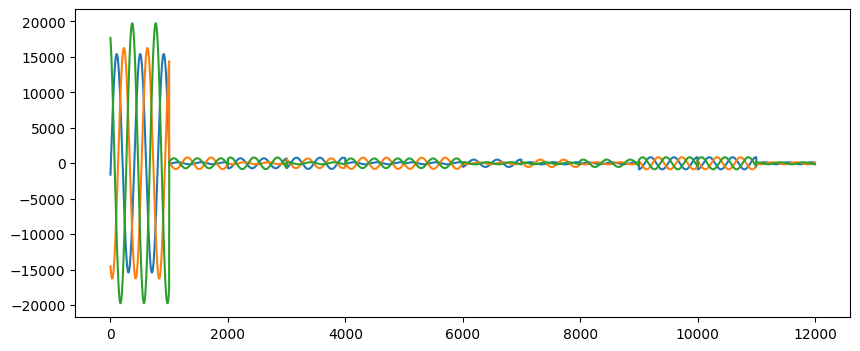

In [201]:
plt.figure(figsize = (10,4))
plt.plot(data["Ia"])
plt.plot(data["Ib"])
plt.plot(data["Ic"]);


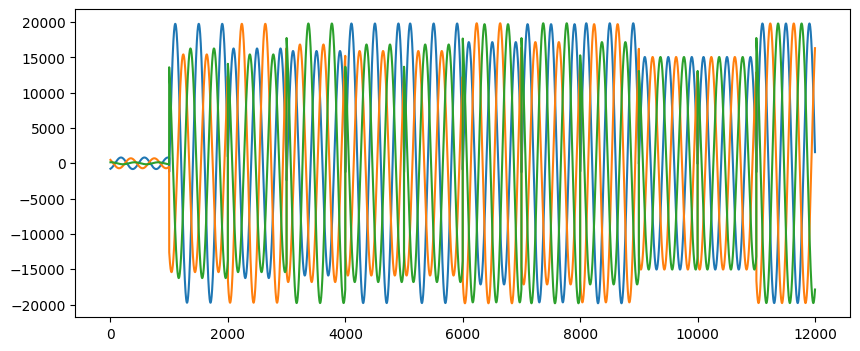

In [202]:
plt.figure(figsize = (10,4))
plt.plot(data["Va"])
plt.plot(data["Vb"])
plt.plot(data["Vc"]);

In [203]:
# Separating Faults into different Categories

In [204]:
# 1. No Fault (Healthy System)
No_Fault = data[data['Fault_Type'] == 'NO Fault' ]
No_Fault.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
11028,0,0,0,0,-31.996551,-104.931525,136.928076,7262.562111,-19573.881170,12311.319060,NO Fault
11699,0,0,0,0,-111.322013,133.746930,-22.424916,-19726.811340,11228.978680,8497.832659,NO Fault
11949,0,0,0,0,142.473394,-58.281267,-84.192127,15063.947800,3582.575685,-18646.523490,NO Fault
11222,0,0,0,0,44.995565,95.287605,-140.283170,-5497.897303,19212.695140,-13714.797830,NO Fault
11052,0,0,0,0,21.654425,-133.465557,111.811131,13529.338210,-19272.381160,5743.042945,NO Fault


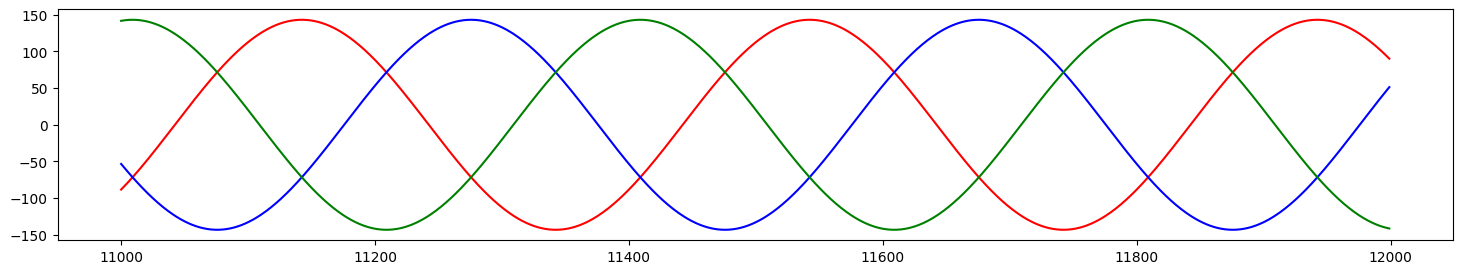

In [205]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Ia"],'r')
ax = plt.plot(No_Fault["Ib"],'b')
ax = plt.plot(No_Fault["Ic"],'g');

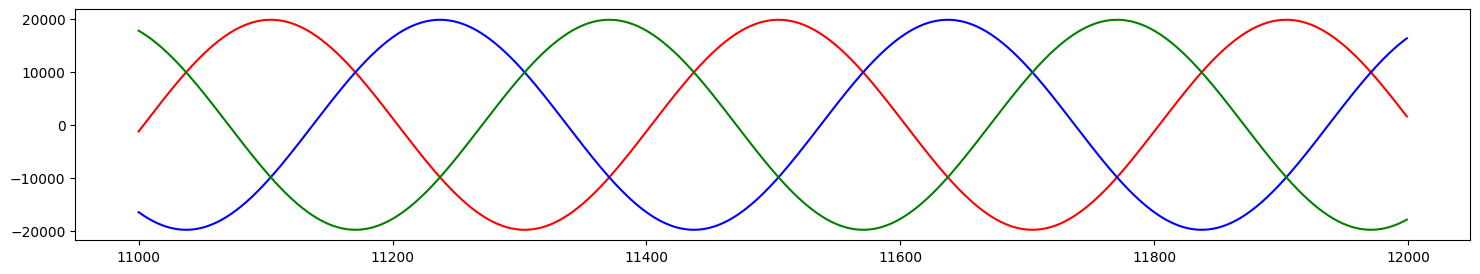

In [206]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Va"],'r')
ax = plt.plot(No_Fault["Vb"],'b')
ax = plt.plot(No_Fault["Vc"],'g');

In [207]:
# 2. Faulty System with Line A to Ground Fault
Line_AG_Fault = data[data['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
6000,1,0,0,1,-507.321045,-41.886618,153.357972,-897.347542,-16547.146800,17659.376520,Line A to Ground Fault
6001,1,0,0,1,-505.476312,-43.801003,153.824668,-628.155092,-16716.465810,17520.301340,Line A to Ground Fault
6002,1,0,0,1,-503.506890,-45.704562,154.253427,-358.807627,-16881.660300,17376.903270,Line A to Ground Fault
6003,1,0,0,1,-501.413265,-47.596826,154.644145,-89.371604,-17042.689510,17229.217700,Line A to Ground Fault
6004,1,0,0,1,-499.195954,-49.477327,154.996726,180.086496,-17199.513700,17077.281050,Line A to Ground Fault


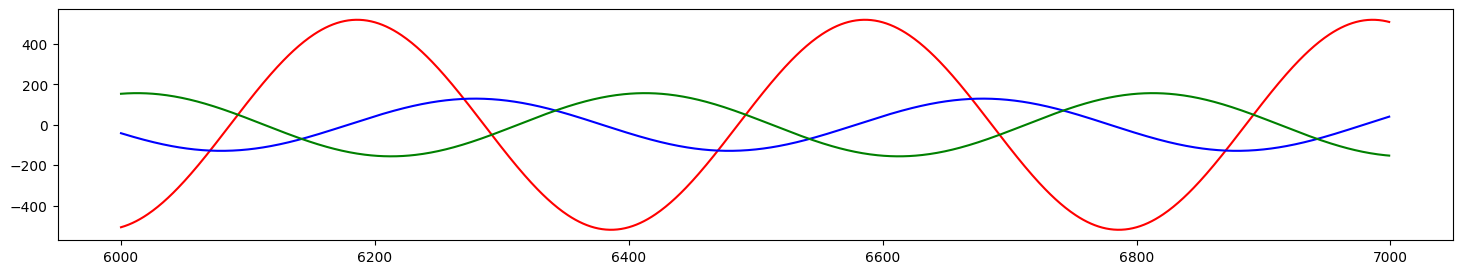

In [208]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r')
ax = plt.plot(Line_AG_Fault["Ib"],'b')
ax = plt.plot(Line_AG_Fault["Ic"],'g');

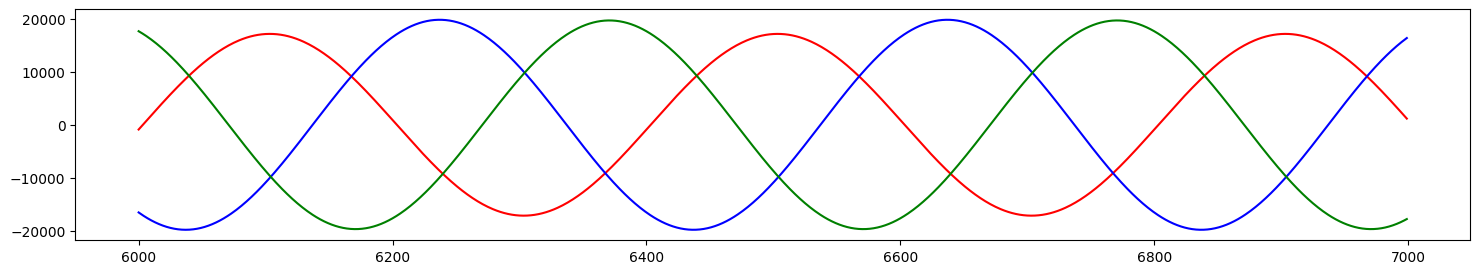

In [209]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Va"],'r')
ax = plt.plot(Line_AG_Fault["Vb"],'b')
ax = plt.plot(Line_AG_Fault["Vc"],'g');

In [210]:
# Faulty System with Line A ,Line B to Ground Fault
Line_ABG_Fault = data[data['Fault_Type'] == 'Line A to Line B to Ground Fault' ]
Line_ABG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,1,1,-1608.620160,-14515.237370,17671.860570,-773.926983,476.455876,139.715795,Line A to Line B to Ground Fault
1,1,0,1,1,-1367.654745,-14628.314170,17531.450990,-769.663607,468.208018,140.183403,Line A to Line B to Ground Fault
2,1,0,1,1,-1126.351881,-14737.781650,17386.715780,-765.210329,459.844635,140.616427,Line A to Line B to Ground Fault
3,1,0,1,1,-884.771103,-14843.612800,17237.690660,-760.568250,451.367791,141.014760,Line A to Line B to Ground Fault
4,1,0,1,1,-642.972020,-14945.781510,17084.412390,-755.738513,442.779576,141.378304,Line A to Line B to Ground Fault


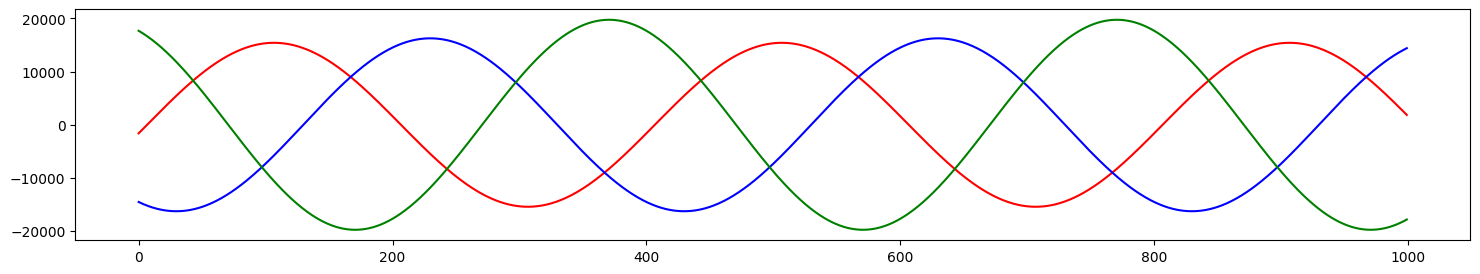

In [211]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Ia"],'r')
ax = plt.plot(Line_ABG_Fault["Ib"],'b')
ax = plt.plot(Line_ABG_Fault["Ic"],'g');

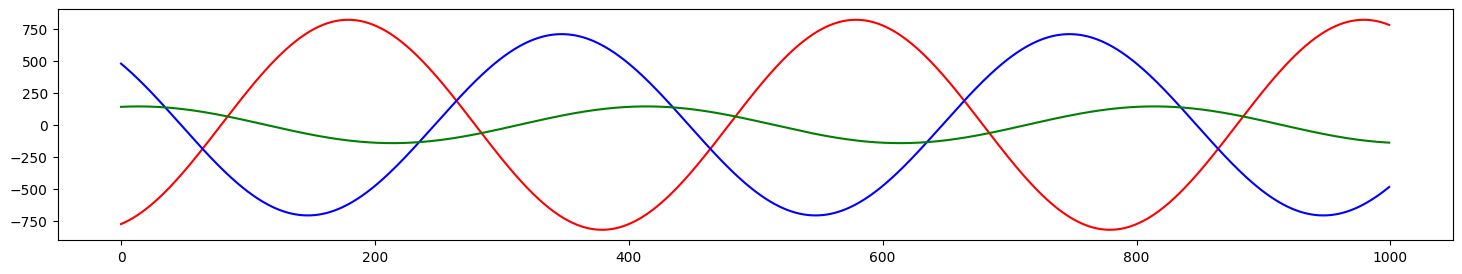

In [212]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r')
ax = plt.plot(Line_ABG_Fault["Vb"],'b')
ax = plt.plot(Line_ABG_Fault["Vc"],'g');

In [213]:
#  Faulty System with Line B to Line C
Line_BC_Fault = data[data['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4000,0,1,1,0,-88.409020,16.148924,72.261884,-1266.825421,-12397.200290,13664.070250,Line B to Line C Fault
4001,0,1,1,0,-86.627388,3.667837,82.961223,-956.463431,-12551.898280,13508.406520,Line B to Line C Fault
4002,0,1,1,0,-84.824382,-8.814155,93.640092,-645.865448,-12703.499270,13349.409790,Line B to Line C Fault
4003,0,1,1,0,-83.000447,-21.293972,104.295858,-335.108108,-12851.965860,13187.119290,Line B to Line C Fault
4004,0,1,1,0,-81.156033,-33.768536,114.925889,-24.268084,-12997.261430,13021.575070,Line B to Line C Fault


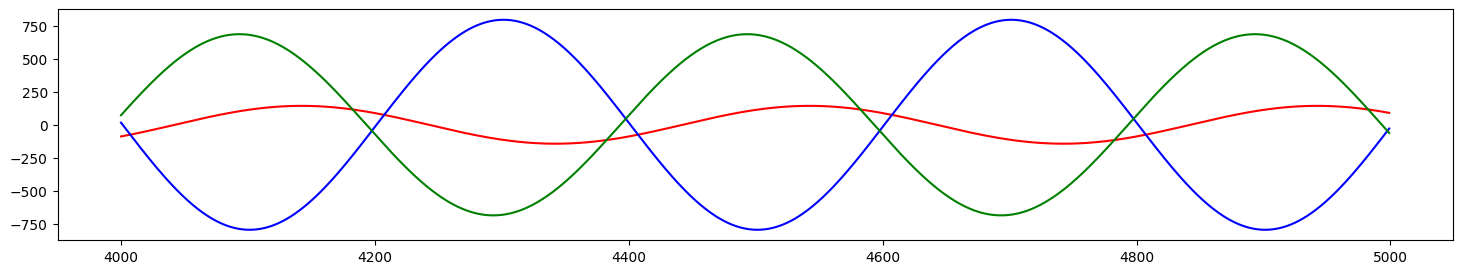

In [214]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r')
ax = plt.plot(Line_BC_Fault["Ib"],'b')
ax = plt.plot(Line_BC_Fault["Ic"],'g');

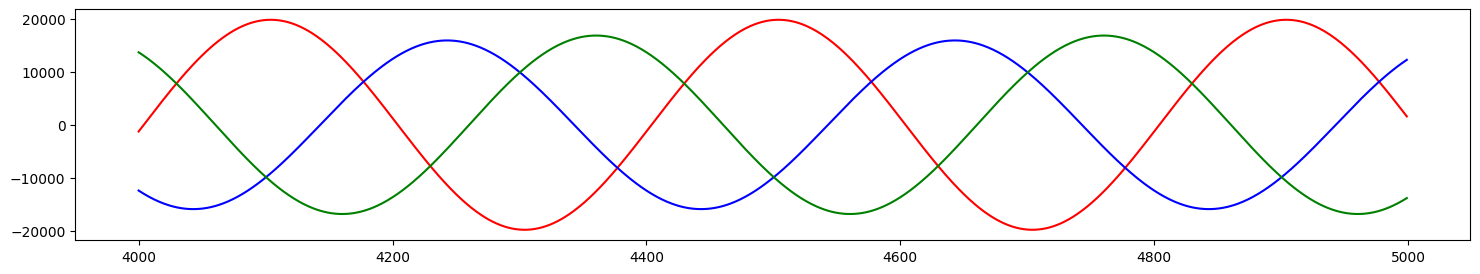

In [215]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Va"],'r')
ax = plt.plot(Line_BC_Fault["Vb"],'b')
ax = plt.plot(Line_BC_Fault["Vc"],'g');

In [216]:
# 5. Faulty System with Line A - Line B - Line C
Line_ABC_Fault = data[data['Fault_Type'] == 'Line A to Line B to Line C Fault' ]
Line_ABC_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
10000,0,1,1,1,-852.292893,398.089966,454.202927,-82.678710,-12989.295920,13071.974630,Line A to Line B to Line C Fault
10001,0,1,1,1,-851.678879,386.192746,465.486132,153.671349,-13106.988070,12953.316720,Line A to Line B to Line C Fault
10002,0,1,1,1,-850.854725,374.200239,476.654487,389.983491,-13221.446270,12831.462780,Line A to Line B to Line C Fault
10003,0,1,1,1,-849.820637,362.115404,487.705234,626.199412,-13332.642280,12706.442870,Line A to Line B to Line C Fault
10004,0,1,1,1,-848.576868,349.941222,498.635647,862.260827,-13440.548660,12578.287830,Line A to Line B to Line C Fault


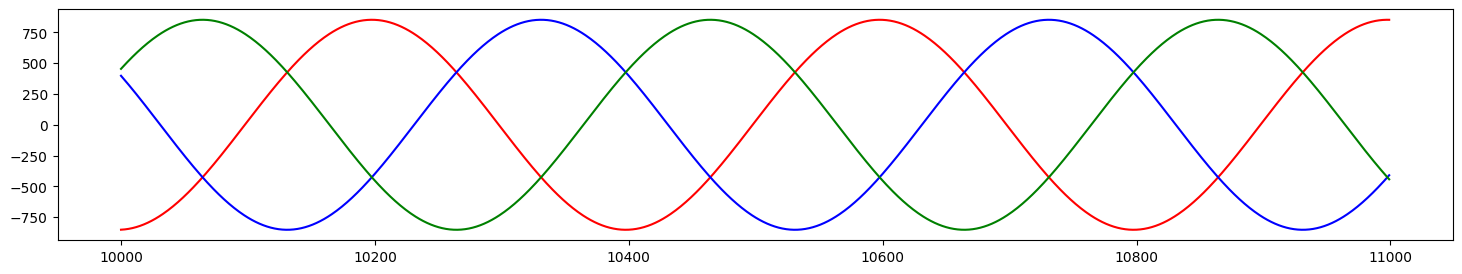

In [217]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r')
ax = plt.plot(Line_ABC_Fault["Ib"],'b')
ax = plt.plot(Line_ABC_Fault["Ic"],'g');

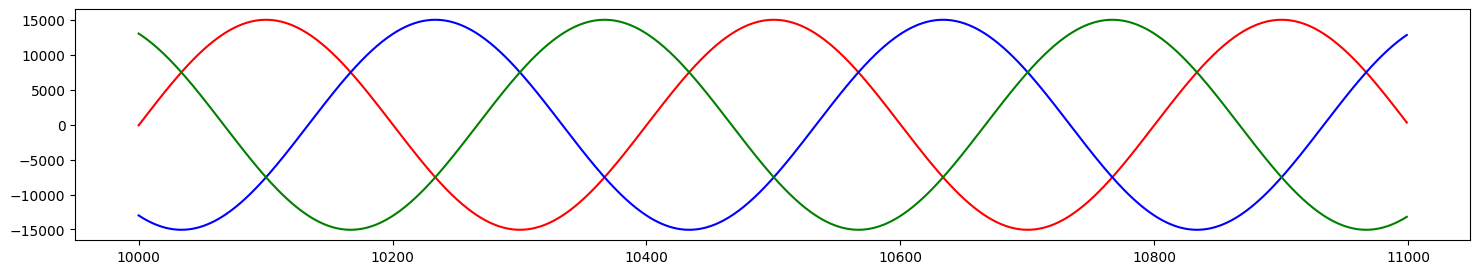

In [218]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r')
ax = plt.plot(Line_ABC_Fault["Vb"],'b')
ax = plt.plot(Line_ABC_Fault["Vc"],'g');

In [219]:
# 6. Faulty System with Line A - Line B - Line C - Ground
Line_ABCG_Fault = data[data['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type


In [220]:
# Categorical to Numerical conversion
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Fault_Type'] = encoder.fit_transform(data['Fault_Type'])
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,1,1,-1608.62,-14515.24,17671.86,-773.93,476.46,139.72,2
1,1,0,1,1,-1367.65,-14628.31,17531.45,-769.66,468.21,140.18,2
2,1,0,1,1,-1126.35,-14737.78,17386.72,-765.21,459.84,140.62,2
3,1,0,1,1,-884.77,-14843.61,17237.69,-760.57,451.37,141.01,2
4,1,0,1,1,-642.97,-14945.78,17084.41,-755.74,442.78,141.38,2


In [221]:
# Dependent and Independent Variable Sepration
X = data.drop(['Fault_Type'],axis=1)
y = data['Fault_Type']

In [222]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)


In [223]:
!pip install --upgrade scikit-learn

Training Accuracy    : 15.93 %
Model Accuracy Score : 14.96 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.16      0.42      0.23       186
           1       0.00      0.00      0.00       216
           2       0.23      0.57      0.33       201
           3       0.00      0.00      0.00       222
           4       0.00      0.00      0.00       185
           5       0.10      0.33      0.16       195
           6       0.00      0.00      0.00       200
           7       0.19      0.07      0.11       201
           8       0.15      0.37      0.21       187
           9       0.13      0.08      0.10       208
          10       0.01      0.00      0.01       210
          11       0.00      0.00      0.00       189

    accuracy                           0.15      2400
   macro avg       0.08      0.15      0.10      2400
weighted avg       0.08      0.15      0.09 

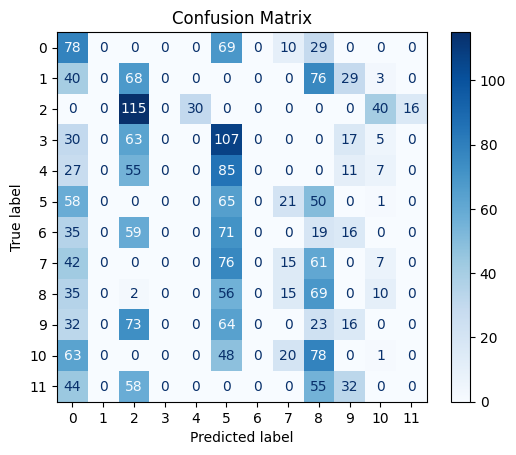

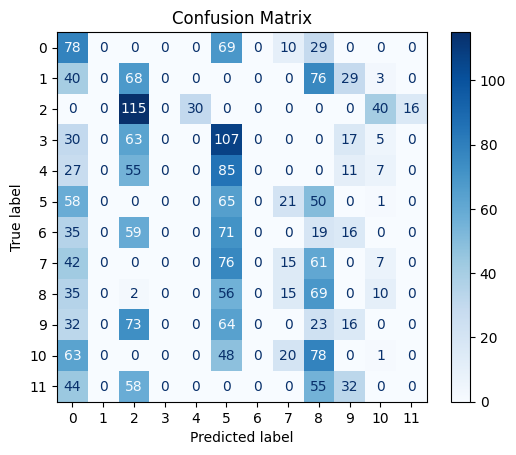

In [224]:
#supervices algo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr),
                                    display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#testing new methode
logreg1=LogisticRegression()
logreg1.fit(X_train,y_train)
y_pred_lr1=logreg1.predict(X_test)
log_train1=round(logreg1.score(X_train,y_train)*100,2)
log_accuracy1=round(accuracy_score(y_pred_lr1,y_test)*100,2)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr1),
                                    display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       216
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       222
           4       1.00      1.00      1.00       185
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       201
           8       1.00      1.00      1.00       187
           9       1.00      1.00      1.00       208
          10       1.00      1.00      1.00       210
          11       1.00      1.00      1.00       189

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00 

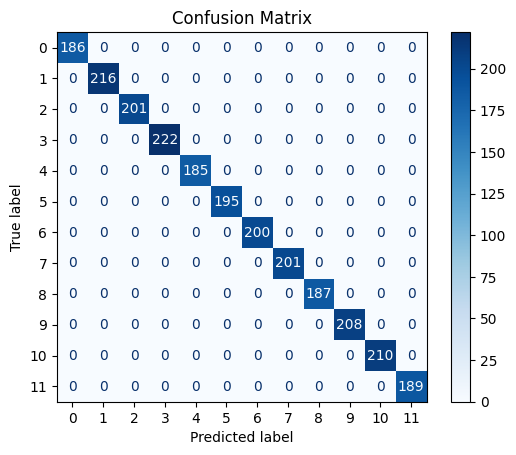

In [225]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dec),
                              display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [226]:
!pip install xgboost

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       216
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       222
           4       1.00      1.00      1.00       185
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       201
           8       1.00      1.00      1.00       187
           9       1.00      1.00      1.00       208
          10       1.00      1.00      1.00       210
          11       1.00      1.00      1.00       189

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00 

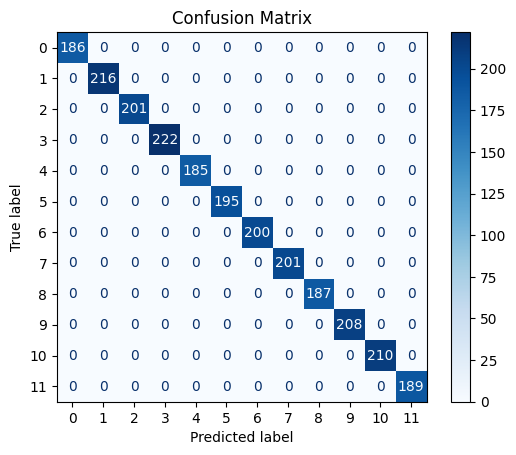

In [227]:
# Random Forest supervice algo
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf),
                                display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       216
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       222
           4       1.00      1.00      1.00       185
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       201
           8       1.00      1.00      1.00       187
           9       1.00      1.00      1.00       208
          10       1.00      1.00      1.00       210
          11       1.00      1.00      1.00       189

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00 

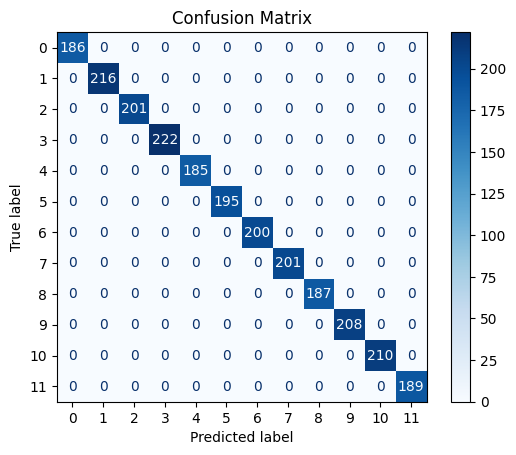

In [228]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb),
                                display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 49.24 %
Model Accuracy Score : 45.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.67      0.44      0.53       186
           1       0.42      0.44      0.43       216
           2       1.00      1.00      1.00       201
           3       0.00      0.00      0.00       222
           4       0.26      1.00      0.42       185
           5       0.73      0.45      0.56       195
           6       0.22      0.33      0.26       200
           7       0.37      0.47      0.41       201
           8       0.68      0.46      0.55       187
           9       0.41      0.19      0.26       208
          10       0.60      0.70      0.65       210
          11       0.57      0.02      0.04       189

    accuracy                           0.45      2400
   macro avg       0.49      0.46      0.43      2400
weighted avg       0.49      0.45      0.42 

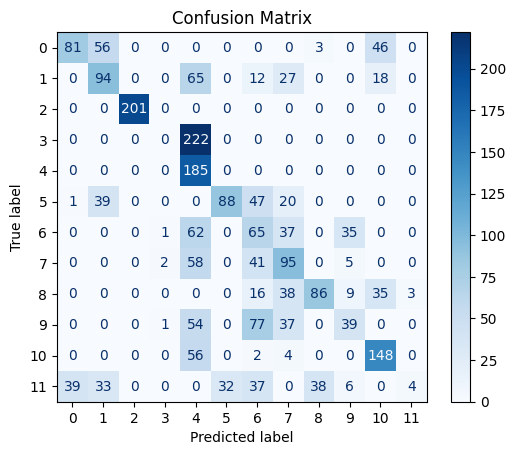

In [229]:
# Support Vector Machines supervices algo
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svc),
                              display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [230]:
# int The Results :

In [231]:
prediction5 = logreg.predict(X_test)
print(prediction5)

[5 0 0 ... 8 8 8]


In [232]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
11321,11,2
10009,3,5
9334,4,2
4382,6,2
1498,7,7


In [233]:
#comparing models
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],

    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train, xgb_train],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy
    ]
})

In [234]:
pd.set_option('display.precision', 2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide(axis='index').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
Random Forest,100.000000,100.000000
XGBClassifier,100.000000,100.000000
Decision Tree,100.000000,100.000000
Logistic Regression,49.240000,45.250000
Support Vector Machines,15.930000,14.960000
